<a href="https://colab.research.google.com/github/DhrumilBhatiya/CODSOFT/blob/main/Project2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS FLOWER CLASSIFICATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/CodSoft/Project2/IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Cleaning


In [ ]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

In [ ]:
# visulize
species_c = data['species'].value_counts()
species_c

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

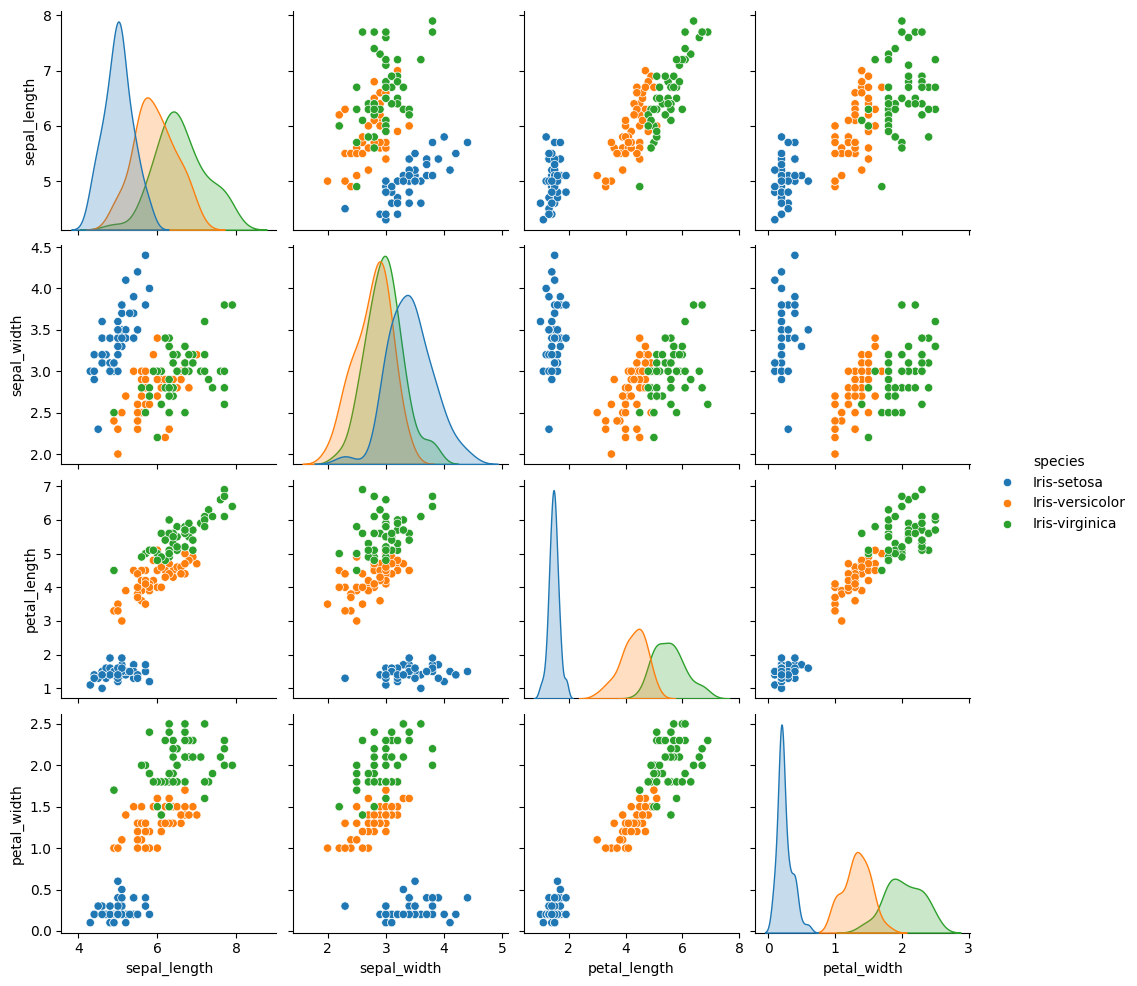

In [ ]:
sns.pairplot(data,hue='species')

<Axes: xlabel='species', ylabel='sepal_length'>

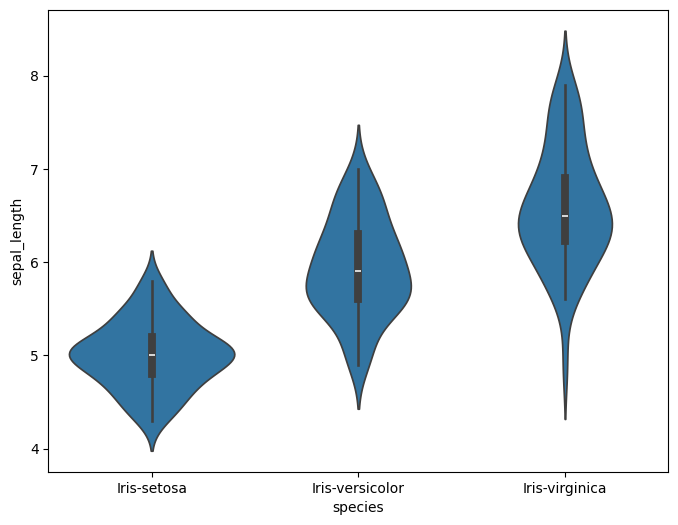

In [ ]:
# Violin Plot for Sepal Length
fig, ax = plt.subplots(figsize =(8,6))
sns.violinplot(ax = ax, x = data['species'], y = data['sepal_length'])

<Axes: xlabel='species', ylabel='sepal_width'>

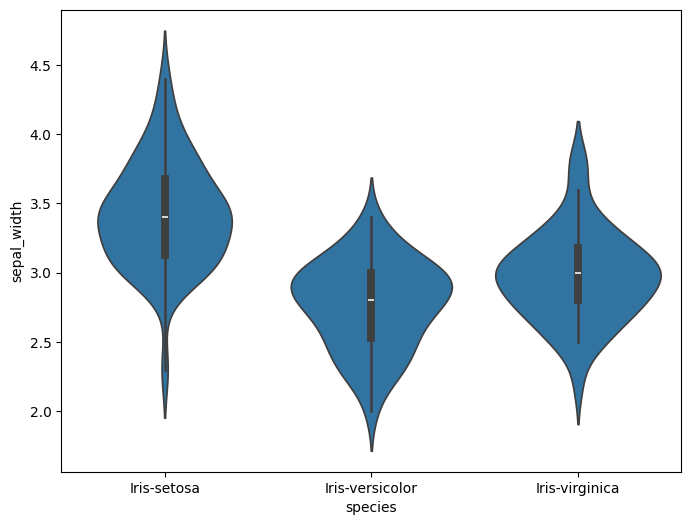

In [ ]:
# Violin Plot for Sepal Width
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(ax=ax,x=data['species'],y=data['sepal_width'])

<Axes: xlabel='species', ylabel='petal_length'>

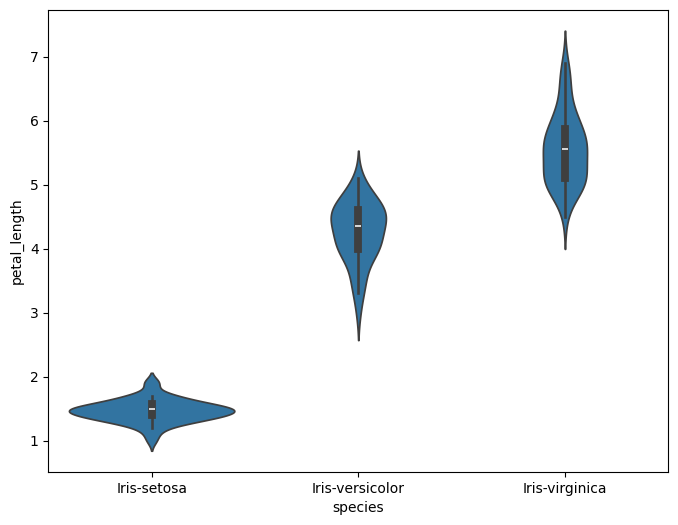

In [ ]:
# Violin Plot for Petal Length
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(ax=ax,x=data['species'],y=data['petal_length'])

<Axes: xlabel='species', ylabel='petal_width'>

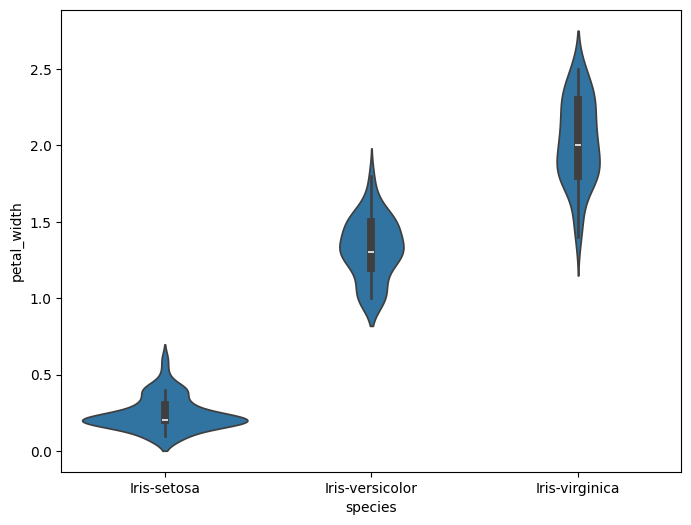

In [ ]:
# Violin Plot for Petal Width
fig,ax = plt.subplots(figsize=(8,6))
sns.violinplot(ax=ax,x=data['species'],y=data['petal_width'])

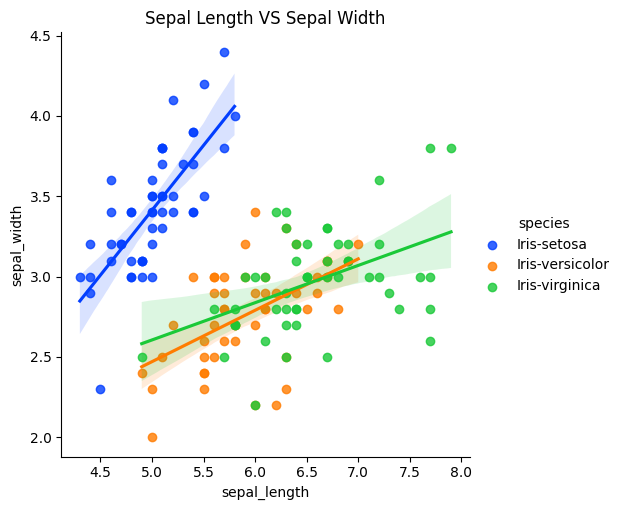

In [ ]:
sns.lmplot(x="sepal_length",y="sepal_width",hue="species",palette="bright",data=data)

plt.title("Sepal Length VS Sepal Width")
plt.show()

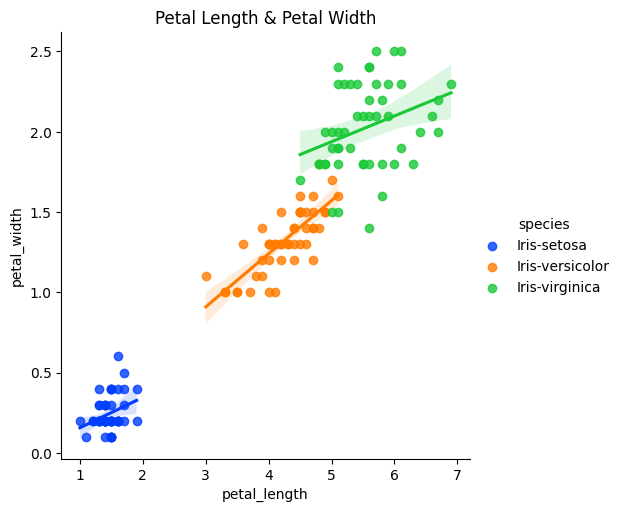

In [ ]:
sns.lmplot(x='petal_length',y='petal_width',hue='species',palette='bright',data=data)
plt.title('Petal Length & Petal Width')
plt.show()

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['species'] = label.fit_transform(data['species'])

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = data.drop('species', axis=1)
y = data['species']

# Split The Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

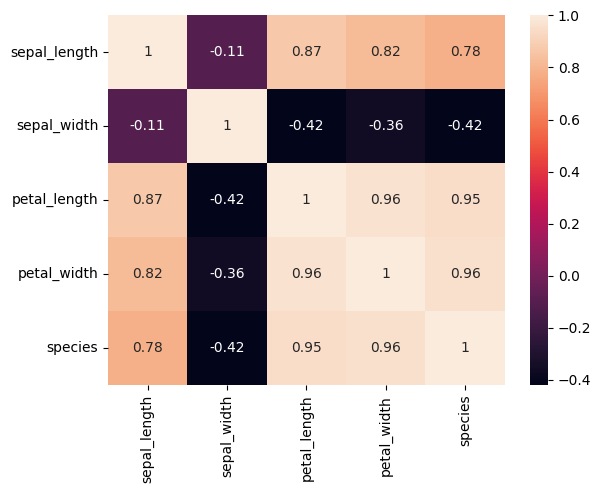

In [ ]:
sns.heatmap(data.corr(),annot=True)

# Implement Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1])

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[14  0  0]
 [ 0  8  1]
 [ 0  1 14]]


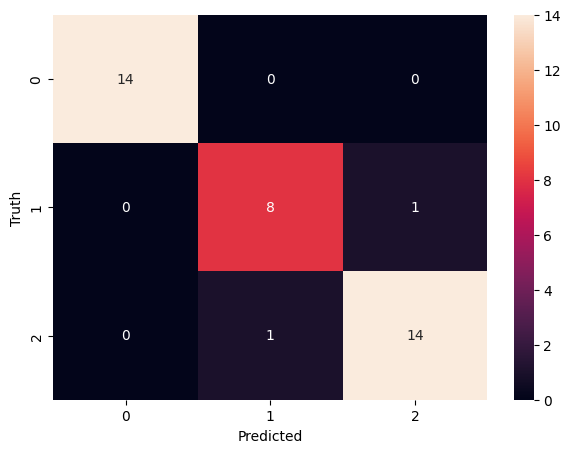

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.89      0.89         9
           2       0.93      0.93      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {round(accuracy*100,2)}%")

Accuracy Score: 94.74%
